In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, clear_output

In [2]:
dataset= pd.read_csv("stroke prediction.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
dataset["gender"]=dataset["gender"].astype('category')
dataset["ever_married"]=dataset["ever_married"].astype('category')
dataset["Residence_type"]=dataset["Residence_type"].astype('category')
dataset["work_type"]=dataset["work_type"].astype('category')
dataset["smoking_status"]=dataset.smoking_status.astype('category')

In [6]:
dataset_imputed=dataset.copy()

In [7]:
X=dataset_imputed.drop(columns=["id","stroke"],axis=1)
y=dataset_imputed["stroke"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=88,stratify=y)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

X_train.gender=encoder.fit_transform(X_train.gender)

X_train.ever_married=encoder.fit_transform(X_train.ever_married)

X_train.work_type=encoder.fit_transform(X_train.work_type)

X_train.Residence_type=encoder.fit_transform(X_train.Residence_type)

X_train.smoking_status=X_train.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

X_test.gender=encoder.fit_transform(X_test.gender)

X_test.ever_married=encoder.fit_transform(X_test.ever_married)

X_test.work_type=encoder.fit_transform(X_test.work_type)

X_test.Residence_type=encoder.fit_transform(X_test.Residence_type)

X_test.smoking_status=X_test.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2})

In [10]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,child_adult
8196,1,4.0,0,0,0,4,1,136.51,17.1,NaN,0
23697,1,9.0,0,0,0,4,0,90.55,27.3,NaN,0
28023,1,29.0,0,0,1,2,0,108.69,29.6,0,1
5054,1,63.0,0,0,1,2,1,84.57,31.2,1,1
33294,0,67.0,0,0,1,3,0,70.43,26.3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14160,0,62.0,0,0,1,2,1,58.90,29.1,NaN,1
21610,0,43.0,0,0,0,0,1,94.82,29.7,0,1
4408,0,23.0,0,0,0,2,1,98.66,28.3,NaN,1
4539,1,9.0,0,0,0,4,1,150.00,17.4,NaN,0


In [11]:
from sklearn.impute import KNNImputer

imputer=KNNImputer()

X_trimputed=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

X_teimputed=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [12]:
X_trimputed["smoking_status"]=X_trimputed["smoking_status"].apply(round)
X_trimputed["smoking_status"].value_counts()

X_trimputed["smoking_status"]=X_trimputed["smoking_status"].astype('category')
X_trimputed["work_type"]=X_trimputed["work_type"].apply(int)
X_trimputed["work_type"]=X_trimputed["work_type"].astype('category')

In [13]:
X_teimputed["smoking_status"]=X_teimputed["smoking_status"].apply(round)
X_teimputed["smoking_status"].value_counts()

X_teimputed["smoking_status"]=X_teimputed["smoking_status"].astype('category')
X_teimputed["work_type"]=X_teimputed["work_type"].apply(int)
X_teimputed["work_type"]=X_teimputed["work_type"].astype('category')

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()

# scaler.fit(X_trimputed)

# X_trimputed=pd.DataFrame(scaler.transform(X_trimputed),columns=X_train.columns)

# X_teimputed=pd.DataFrame(scaler.transform(X_teimputed),columns=X_test.columns)

In [15]:
X_trimputed=pd.concat([X_trimputed,pd.get_dummies(X_trimputed[["work_type","smoking_status"]]).drop(columns=["work_type_0","smoking_status_0"])],axis=1)
X_teimputed=pd.concat([X_teimputed,pd.get_dummies(X_teimputed[["work_type","smoking_status"]]).drop(columns=["work_type_0","smoking_status_0"])],axis=1)

In [16]:
X_trimputed.drop(columns=['work_type','smoking_status'],inplace=True)
X_teimputed.drop(columns=['work_type','smoking_status'],inplace=True)

In [17]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(random_state=40)

classifier.fit(X_trimputed,y_train)

y_train_pred = classifier.predict(X_trimputed)
y_test_pred = classifier.predict(X_teimputed)

In [18]:
classifier.get_depth()

28

In [19]:
classifier.get_n_leaves()

1207

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34094
           1       1.00      1.00      1.00       626

    accuracy                           1.00     34720
   macro avg       1.00      1.00      1.00     34720
weighted avg       1.00      1.00      1.00     34720



In [21]:
from sklearn.metrics import f1_score

print(f1_score(y_train,y_train_pred),f1_score(y_test,y_test_pred))

1.0 0.046511627906976744


In [22]:
from sklearn import tree

decision_tree = tree.export_graphviz(classifier,out_file='tree.dot',feature_names=X_trimputed.columns,max_depth=2,filled=True)

In [23]:
#!dot -Tpng tree.dot -o tree.png

In [24]:
# import pydot

# (graph,) = pydot.graph_from_dot_file('tree.dot')
# graph.write_png('tree.png')

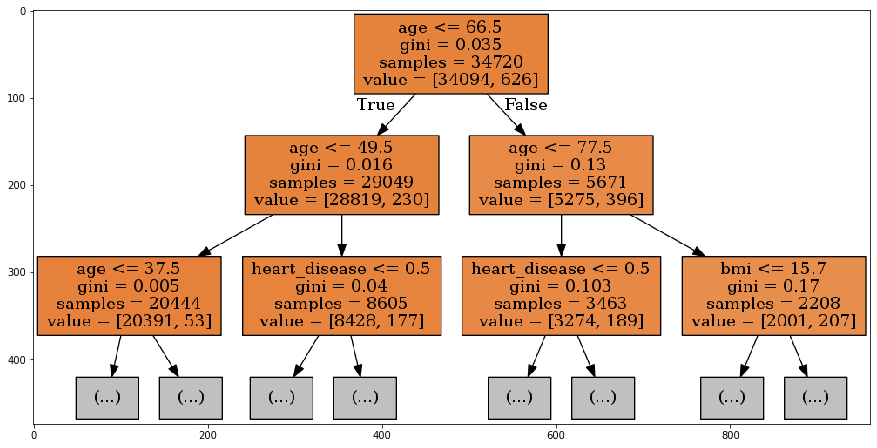

In [25]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

## Changing Max_Depth

In [26]:
train_f1,test_f1=[],[]

for i in range(1,30):
    
    classifier=DecisionTreeClassifier(max_depth=i,random_state=40)
    
    classifier.fit(X_trimputed,y_train)

    y_train_pred = classifier.predict(X_trimputed)
    y_test_pred = classifier.predict(X_teimputed)
    
    train_f1.append(f1_score(y_train_pred,y_train))
    test_f1.append(f1_score(y_test_pred,y_test))

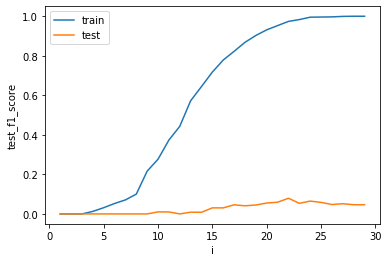

In [27]:
df=pd.DataFrame({"i":range(1,30),"train_f1_score":train_f1,"test_f1_score":test_f1})

sns.lineplot(y="train_f1_score",x="i",data=df,label="train")
sns.lineplot(y="test_f1_score",x="i",data=df,label="test")

## Changing Max_Leaf_Nodes

In [28]:
train_f1,test_f1=[],[]

for i in range(10,1500,10):
    
    classifier=DecisionTreeClassifier(max_leaf_nodes=i,random_state=40)
    
    classifier.fit(X_trimputed,y_train)

    y_train_pred = classifier.predict(X_trimputed)
    y_test_pred = classifier.predict(X_teimputed)
    
    train_f1.append(f1_score(y_train_pred,y_train))
    test_f1.append(f1_score(y_test_pred,y_test))

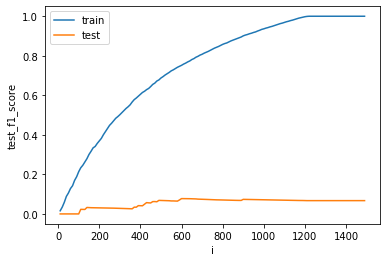

In [29]:
df=pd.DataFrame({"i":range(10,1500,10),"train_f1_score":train_f1,"test_f1_score":test_f1})

sns.lineplot(y="train_f1_score",x="i",data=df,label="train")
sns.lineplot(y="test_f1_score",x="i",data=df,label="test")

## Min Samples Split

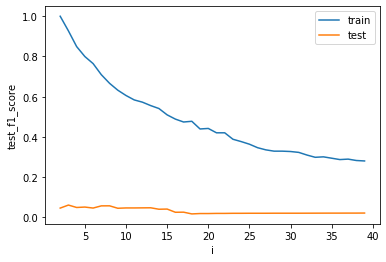

In [30]:
train_f1,test_f1=[],[]

for i in range(2,40):
    
    classifier=DecisionTreeClassifier(min_samples_split=i,random_state=40)
    
    classifier.fit(X_trimputed,y_train)

    y_train_pred = classifier.predict(X_trimputed)
    y_test_pred = classifier.predict(X_teimputed)
    
    train_f1.append(f1_score(y_train_pred,y_train))
    test_f1.append(f1_score(y_test_pred,y_test))
    
df=pd.DataFrame({"i":range(2,40),"train_f1_score":train_f1,"test_f1_score":test_f1})
sns.lineplot(y="train_f1_score",x="i",data=df,label="train")
sns.lineplot(y="test_f1_score",x="i",data=df,label="test")

## Min Samples for Terminal Node

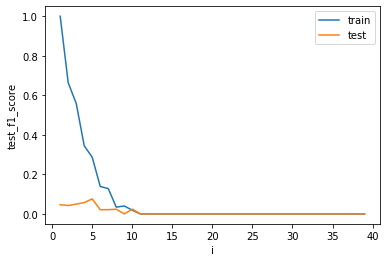

In [31]:
train_f1,test_f1=[],[]

for i in range(1,40):
    
    classifier=DecisionTreeClassifier(min_samples_leaf=i,random_state=40)
    
    classifier.fit(X_trimputed,y_train)

    y_train_pred = classifier.predict(X_trimputed)
    y_test_pred = classifier.predict(X_teimputed)
    
    train_f1.append(f1_score(y_train_pred,y_train))
    test_f1.append(f1_score(y_test_pred,y_test))
    
df=pd.DataFrame({"i":range(1,40),"train_f1_score":train_f1,"test_f1_score":test_f1})
sns.lineplot(y="train_f1_score",x="i",data=df,label="train")
sns.lineplot(y="test_f1_score",x="i",data=df,label="test")

## Changing Multiple Things

In [32]:
df=pd.DataFrame(columns=["Min_Sample_Leaf","Min_Samples_Split","Max_depth","Train_F1","Test_F1"])
c=0
for i in range(1,15):
    for j in range(2,20):
        
        for l in range(1,30):
            
            classifier=DecisionTreeClassifier(max_depth=l,min_samples_split=j,min_samples_leaf=i,random_state=40)
    
            classifier.fit(X_trimputed,y_train)

            y_train_pred = classifier.predict(X_trimputed)
            y_test_pred = classifier.predict(X_teimputed)
            df=df.append({"Min_Sample_Leaf":int(i),"Min_Samples_Split":int(j),"Max_depth":int(l),
                                   "Train_F1":f1_score(y_train_pred,y_train),"Test_F1":f1_score(y_test_pred,y_test)},ignore_index=True)
            
                
            display(df)
            clear_output()         

            

In [33]:
df

,Min_Sample_Leaf,Min_Samples_Split,Max_depth,Train_F1,Test_F1
0,1.0,2.0,1.0,0.000000,0.0
1,1.0,2.0,2.0,0.000000,0.0
2,1.0,2.0,3.0,0.000000,0.0
3,1.0,2.0,4.0,0.012698,0.0
4,1.0,2.0,5.0,0.031447,0.0
...,...,...,...,...,...
7303,14.0,19.0,25.0,0.000000,0.0
7304,14.0,19.0,26.0,0.000000,0.0
7305,14.0,19.0,27.0,0.000000,0.0
7306,14.0,19.0,28.0,0.000000,0.0


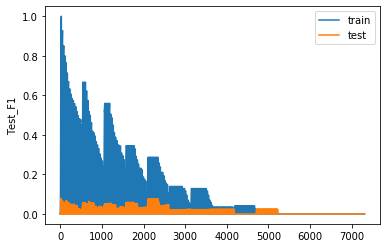

In [34]:
sns.lineplot(y="Train_F1",x=df.index,data=df,label="train")
sns.lineplot(y="Test_F1",x=df.index,data=df,label="test")

In [35]:
df[df["Train_F1"]>0.98]

,Min_Sample_Leaf,Min_Samples_Split,Max_depth,Train_F1,Test_F1
22,1.0,2.0,23.0,0.983133,0.053571
23,1.0,2.0,24.0,0.995192,0.064897
24,1.0,2.0,25.0,0.995990,0.058309
25,1.0,2.0,26.0,0.996795,0.047478
26,1.0,2.0,27.0,0.999201,0.051576
27,1.0,2.0,28.0,1.000000,0.046512
28,1.0,2.0,29.0,1.000000,0.046512
